In [2]:
%pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Step 1: Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: make plots look a bit nicer
sns.set(style="whitegrid")

In [4]:
# Step 2: Load the dataset
# Make sure the dataset file is in the same folder as this notebook
data = pd.read_csv("../online_shoppers_intention_data.csv")

# Display basic information
print("Dataset shape:", data.shape)
print("\nPreview of the dataset:")
display(data.head())

Dataset shape: (12330, 18)

Preview of the dataset:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
# Step 3: Select numerical columns only
numeric_data = data.select_dtypes(include=["int64", "float64"])
print("\nNumerical features used for correlation analysis:")
print(numeric_data.columns.tolist())


Numerical features used for correlation analysis:
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']


In [6]:
# Step 4: Compute correlation matrix
corr_matrix = numeric_data.corr()

print("\nCorrelation matrix (first few columns):")
display(corr_matrix.head())


Correlation matrix (first few columns):


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064


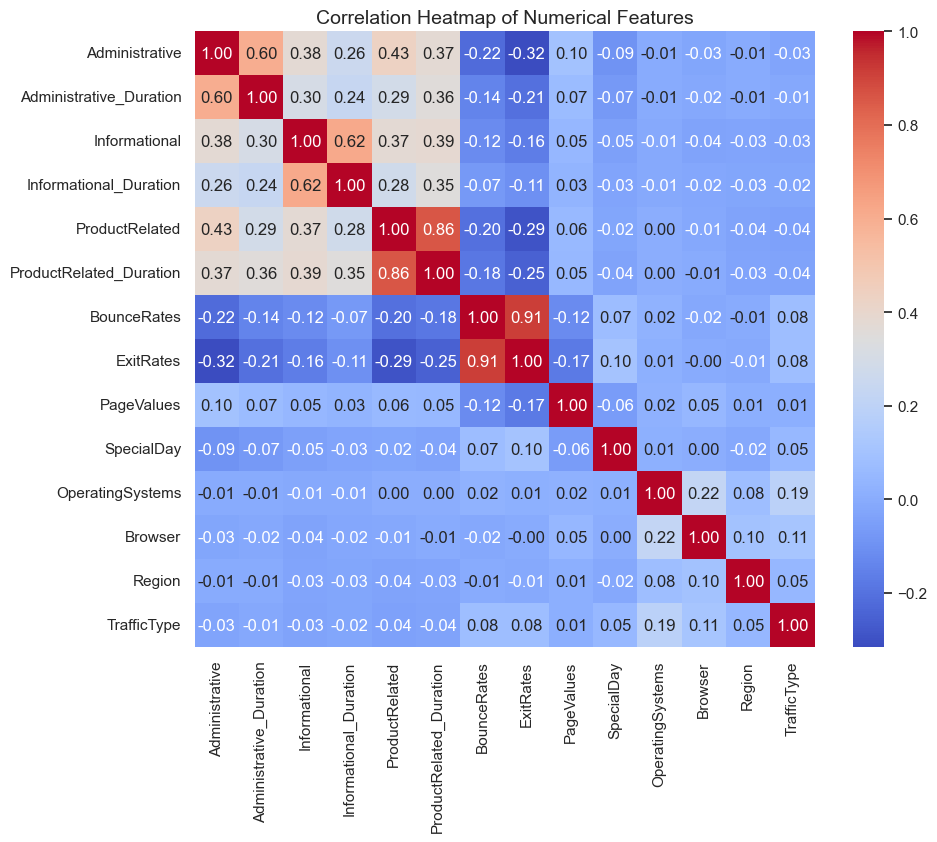

In [7]:
# Step 5: Visualize correlation matrix with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()

In [9]:
# Step 6: Identify possible multicollinearity
# In lecture and lab, we discussed that high correlations (|r| > 0.8)
# indicate potential multicollinearity between predictors.

# Extract pairs with correlation higher than 0.8 (excluding self-correlation)
high_corr = (
    corr_matrix.where((corr_matrix > 0.8) | (corr_matrix < -0.8))
    .stack()
    .reset_index()
)
high_corr.columns = ["Feature 1", "Feature 2", "Correlation"]
high_corr = high_corr[high_corr["Feature 1"] != high_corr["Feature 2"]]

print("\nHighly correlated feature pairs (|r| > 0.8):")
display(high_corr)


Highly correlated feature pairs (|r| > 0.8):


,Feature 1,Feature 2,Correlation
5,ProductRelated,ProductRelated_Duration,0.860927
6,ProductRelated_Duration,ProductRelated,0.860927
9,BounceRates,ExitRates,0.913004
10,ExitRates,BounceRates,0.913004


### Summary of Correlation and Multicollinearity Check
- Most numerical features show low correlations (|r| < 0.4), indicating minimal overlap.
- Two feature pairs have very strong positive correlations:
  - `ProductRelated` and `ProductRelated_Duration` (r = 0.86)
  - `BounceRates` and `ExitRates` (r = 0.91)
- As discussed in Lab 4, highly correlated predictors may cause multicollinearity in regression models.
- For the next phase (Feature Engineering), we plan to either remove one variable from each pair or
  use regularization techniques (Ridge/LASSO) to manage correlation.


### Feature Engineering Interpretation

The correlation analysis revealed strong relationships between:
- `ProductRelated` ↔ `ProductRelated_Duration`
- `BounceRates` ↔ `ExitRates`

From a feature engineering perspective, these variables describe similar behaviors and may cause
multicollinearity in regression-based models. To reduce redundancy and improve interpretability,
we can drop `ProductRelated` and `BounceRates` while retaining `ProductRelated_Duration` and
`ExitRates`, which capture richer behavioral information.

Alternatively, if we plan to apply regularization (as introduced in Lab 4 – LASSO/Ridge),
we may keep all variables, allowing the model to automatically penalize correlated features.
This decision will depend on whether our focus is on interpretability or predictive performance.
